<a href="https://colab.research.google.com/github/pravin-raut/TimeSeries_USD-EUR_WithOilImpact/blob/Master/03_Currency_%26_Oil_Forecast_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import time
start_time = time.time()


#Read the data file created with Feature from 01.Currency_&_Oil_Forecast_Visualization.ipynb Notebook

In [4]:
df_oil_currency = pd.read_csv("/content/drive/MyDrive/dissertation/df_oil_currency.csv")
df_oil_currency['Date'] = pd.to_datetime(df_oil_currency['Date']).dt.date

df_oil_currency.set_index('Date', inplace=True)
df_oil_currency.head(10)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_EUR_USD_Price_t,EUR_USD_Price_standardized,Actual_EUR_USD_Price_t-1,Actual_EUR_USD_Price_t-2,Actual_EUR_USD_Price_t-3,Actual_EUR_USD_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_EUR_USD_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-08,56.09,-0.631024,1.147974,0.486857,1.141044,1.139108,1.131811,1.146171,56.42,55.13,...,1.147289,58.22,59.46,60.00,58.39,58.24,2019,1,8,1
2019-01-09,58.22,-0.534464,1.145607,0.446000,1.147974,1.141044,1.139108,1.131811,56.09,56.42,...,1.141683,59.46,60.00,58.39,58.24,59.52,2019,1,9,2
2019-01-10,59.46,-0.478251,1.155495,0.616671,1.145607,1.147974,1.141044,1.139108,58.22,56.09,...,1.139809,60.00,58.39,58.24,59.52,59.63,2019,1,10,3
2019-01-11,60.00,-0.453771,1.151013,0.539312,1.155495,1.145607,1.147974,1.141044,59.46,58.22,...,1.139264,58.39,58.24,59.52,59.63,60.90,2019,1,11,4
2019-01-14,58.39,-0.526758,1.146014,0.453024,1.151013,1.155495,1.145607,1.147974,60.00,59.46,...,1.136557,58.24,59.52,59.63,60.90,61.49,2019,1,14,0
2019-01-15,58.24,-0.533558,1.147289,0.475036,1.146014,1.151013,1.155495,1.145607,58.39,60.00,...,1.136932,59.52,59.63,60.90,61.49,60.66,2019,1,15,1
2019-01-16,59.52,-0.475531,1.141683,0.378276,1.147289,1.146014,1.151013,1.155495,58.24,58.39,...,1.136402,59.63,60.90,61.49,60.66,60.52,2019,1,16,2
2019-01-17,59.63,-0.470544,1.139809,0.345931,1.141683,1.147289,1.146014,1.151013,59.52,58.24,...,1.138822,60.90,61.49,60.66,60.52,60.22,2019,1,17,3
2019-01-18,60.90,-0.412971,1.139264,0.336520,1.139809,1.141683,1.147289,1.146014,59.63,59.52,...,1.131350,61.49,60.66,60.52,60.22,60.90,2019,1,18,4


#Divide Data into Training and Testing set

In [5]:
# Convert the Timestamp objects to datetime.date objects
train_end_date = pd.to_datetime('2022-12-31').date()
test_end_date = pd.to_datetime('2023-06-30').date()


In [6]:
train_data = df_oil_currency[df_oil_currency.index <= train_end_date].copy()
test_data = df_oil_currency[(df_oil_currency.index > train_end_date) & (df_oil_currency.index <= test_end_date)].copy()
test_data.tail(5)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_EUR_USD_Price_t,EUR_USD_Price_standardized,Actual_EUR_USD_Price_t-1,Actual_EUR_USD_Price_t-2,Actual_EUR_USD_Price_t-3,Actual_EUR_USD_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_EUR_USD_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,74.65,0.210361,1.090667,-0.502253,1.095890,1.099264,1.092037,1.092430,74.14,76.83,...,1.090750,75.15,74.38,74.34,76.14,76.12,2023,6,26,0
2023-06-27,75.15,0.233028,1.091048,-0.495679,1.090667,1.095890,1.099264,1.092037,74.65,74.14,...,1.091310,74.38,74.34,76.14,76.12,76.18,2023,6,27,1
2023-06-28,74.38,0.198121,1.095722,-0.415001,1.091048,1.090667,1.095890,1.099264,75.15,74.65,...,1.088495,74.34,76.14,76.12,76.18,76.61,2023,6,28,2
2023-06-29,74.34,0.196308,1.091584,-0.486431,1.095722,1.091048,1.090667,1.095890,74.38,75.15,...,1.085658,76.14,76.12,76.18,76.61,77.56,2023,6,29,3
2023-06-30,76.14,0.277908,1.086803,-0.568949,1.091584,1.095722,1.091048,1.090667,74.34,74.38,...,1.089064,76.12,76.18,76.61,77.56,78.43,2023,6,30,4


In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Function to Compare Plot

In [8]:
def compare_plots(col1, col2, label1, label2, title):
    plt.figure(figsize=(16,8))
    plt.plot(col1,label=label1)
    plt.plot(col2,label=label2)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()


# Function to Create the Metrics for Model Evaluation




In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred, col1, col2, steps_ahead):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Original Column": col1, "Predicted Column": col2, "Steps Ahead": steps_ahead,
            "Mean Absolute Error": mae, "Mean Squared Error": mse,
            "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}


In [10]:
def calculate_price_band_metrics(data, actual_column, predicted_column, price_bands, steps_ahead=1):
    results = []

    for band in price_bands:
        band_name = f"{band[0]}-{band[1]}"

        # Filter data for the current price band
        mask = (data[actual_column] >= band[0]) & (data[actual_column] < band[1])
        band_data = data[mask]

        # Calculate metrics for the current price band
        metrics = calculate_metrics(band_data[actual_column], band_data[predicted_column], actual_column, predicted_column, steps_ahead)

        # Add band information and number of observations to metrics
        metrics['Price_Band'] = band_name
        metrics['Number of Observations'] = len(band_data)

        results.append(metrics)

    return pd.DataFrame(results)

In [11]:
def plot_metrics_by_band(data, metric_column, title):

    # Set default values for ylabel and title if not provided
    ylabel = metric_column

    NoOfObservation = list(data['Number of Observations'])

    # Create a bar plot with 'Number of Observations' as text labels
    plt.figure(figsize=(7, 5))
    bars = plt.bar(data['Price_Band'], data[metric_column])
    plt.xlabel('Price Band')
    plt.ylabel(ylabel)
    plt.title(title)

    plt.bar_label(bars, labels=NoOfObservation)

    plt.show()


In [12]:
def stepAheadChart(dataframeName,Title):
  # Create a bar plot for MAE
  plt.figure(figsize=(5, 5))
  plt.bar(dataframeName['Steps Ahead'], dataframeName['Mean Absolute Error'])

  plt.xlabel('Steps Ahead')
  plt.ylabel('Mean Absolute Error')
  plt.title(Title)
  plt.show()


# Function to find best MLP params using Grid Search

In [13]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.neural_network import MLPRegressor
import pandas as pd

def find_best_mlp_params(X_train, y_train):
    # Define the hyperparameters and their values
    param_grid = {
        'hidden_layer_sizes': [(10), (5,5)],
        'activation': ['tanh', 'relu', 'logistic', 'identity'],
        'solver': ['adam', 'lbfgs', 'sgd'],
        'alpha': [0.0001, 0.05, 0.1],
        'learning_rate': ['constant', 'adaptive', 'invscaling']
        #'learning_rate_init': [0.1, 0.01, 0.001, 0.0001],

    }

    # Create a MLPRegressor model
    mlp = MLPRegressor(
        random_state=42,
        max_iter=1000

    )

    # Create a TimeSeriesSplit object with more splits if possible
    tscv = TimeSeriesSplit(n_splits=2)

    # Create grid search using TimeSeriesSplit cross validation
    clf = GridSearchCV(mlp, param_grid, cv=tscv, scoring='r2', verbose=0)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Convert CV results to DataFrame and sort by test score
    results_df = pd.DataFrame(clf.cv_results_).sort_values(by='mean_test_score', ascending=False)

    return results_df[['mean_test_score', 'param_activation', 'param_alpha', 'param_hidden_layer_sizes', 'param_learning_rate', 'param_solver']]


# Building model for MLP

In [14]:
from sklearn.neural_network import MLPRegressor

def train_mlp(X_train, y_train, params):
    model = MLPRegressor(
        hidden_layer_sizes=params['param_hidden_layer_sizes'],
        activation=params['param_activation'],
        solver=params['param_solver'],
        alpha=params['param_alpha'],
        learning_rate=params['param_learning_rate'],max_iter=2000,
        random_state=42)

    model.fit(X_train, y_train)

    score = model.score(X_train, y_train)

    print(f"Score for {params['param_activation']}:", score)

    return model


#Currency

# Selecting the Feature Columns & Prediction Column whcih will be used for Prediction

In [15]:
#DateAttributes=['Day','Month']
DateAttributes=[]


In [16]:
FeatureColumnsCurrency = [col for col in train_data.columns if col.startswith('Actual_EUR_USD_Price_t-')]
FeatureColumnsCurrency.insert(0,'Actual_EUR_USD_Price_t')
FeatureColumnsCurrency.extend(DateAttributes)

PredictedColumnCurrency='Actual_EUR_USD_Price_t+1'
FeatureColumnsCurrency

['Actual_EUR_USD_Price_t',
 'Actual_EUR_USD_Price_t-1',
 'Actual_EUR_USD_Price_t-2',
 'Actual_EUR_USD_Price_t-3',
 'Actual_EUR_USD_Price_t-4']

# Scaling the values to bring them on same Scale

In [17]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler
Curscaler = MinMaxScaler(feature_range=(0,1))

X_train = train_data[FeatureColumnsCurrency].values
X_train_Curscaled = Curscaler.fit_transform(X_train)

Curscaler_y = MinMaxScaler(feature_range=(0,1))

Y_train = train_data[PredictedColumnCurrency].values
Y_train_Curscaled = Curscaler_y.fit_transform(Y_train.reshape(-1,1))



#Finding the Best Param

In [18]:
import warnings
warnings.filterwarnings("ignore")


In [19]:
pd.set_option('display.max_colwidth', 1000)


In [20]:
# Assuming you have X_train and Y_train already defined
best_params_Cur = find_best_mlp_params(X_train_Curscaled, Y_train_Curscaled.ravel())
selected_columns = best_params_Cur.groupby('param_activation')[['mean_test_score']].idxmax()
best_params_Cur = best_params_Cur.loc[selected_columns['mean_test_score'],
                         ['param_activation', 'param_alpha',
                          'param_hidden_layer_sizes',
                          'param_learning_rate', 'param_solver',
                          'mean_test_score']]
best_params_Cur.sort_values(by='mean_test_score', ascending=False)

,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,mean_test_score
58,relu,0.0001,10,adaptive,lbfgs,0.976517
169,identity,0.0001,10,invscaling,lbfgs,0.976051
19,tanh,0.05,10,constant,lbfgs,0.964009
127,logistic,0.05,10,constant,lbfgs,0.917590


# Fitting the Model

In [21]:

for index, params in best_params_Cur.iterrows():
    model = train_mlp(X_train_Curscaled, Y_train_Curscaled.ravel(), params.to_dict())


Score for identity: 0.9919965857694966
Score for logistic: 0.9892264390264801
Score for relu: 0.9904709580659735
Score for tanh: 0.9929790887843388


In [22]:
Cur_params = best_params_Cur[best_params_Cur['param_activation'] == 'relu']

Curmodel = train_mlp(X_train_Curscaled, Y_train_Curscaled.ravel(), Cur_params.iloc[0].to_dict())

Score for relu: 0.9904709580659735


# Recursive multi-step forecasting using 1 Step Ahead model to Predct upto 5 Step Ahead for USD-EUR Exchange rate

In [23]:
FeatureColumnsCurrency=['Actual_EUR_USD_Price_t','Actual_EUR_USD_Price_t-1','Actual_EUR_USD_Price_t-2','Actual_EUR_USD_Price_t-3','Actual_EUR_USD_Price_t-4']

StepsAheadPrediction=5
for i in range(1,StepsAheadPrediction+1):
  print(f"Features used in Step {i} are {FeatureColumnsCurrency}")
  X_test = test_data[FeatureColumnsCurrency+DateAttributes].values
  X_test_scaled = Curscaler.transform(X_test)
  scaled_predictions = Curmodel.predict(X_test_scaled)
  scaled_predictions = scaled_predictions.reshape(-1, 1)
  predictions = Curscaler_y.inverse_transform(scaled_predictions)
  test_data['Predicted_EUR_USD_Price_t+'+str(i)] = predictions
  FeatureColumnsCurrency.pop(-1)
  FeatureColumnsCurrency.insert(0,'Predicted_EUR_USD_Price_t+'+str(i))



Features used in Step 1 are ['Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Actual_EUR_USD_Price_t-2', 'Actual_EUR_USD_Price_t-3', 'Actual_EUR_USD_Price_t-4']
Features used in Step 2 are ['Predicted_EUR_USD_Price_t+1', 'Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Actual_EUR_USD_Price_t-2', 'Actual_EUR_USD_Price_t-3']
Features used in Step 3 are ['Predicted_EUR_USD_Price_t+2', 'Predicted_EUR_USD_Price_t+1', 'Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Actual_EUR_USD_Price_t-2']
Features used in Step 4 are ['Predicted_EUR_USD_Price_t+3', 'Predicted_EUR_USD_Price_t+2', 'Predicted_EUR_USD_Price_t+1', 'Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1']
Features used in Step 5 are ['Predicted_EUR_USD_Price_t+4', 'Predicted_EUR_USD_Price_t+3', 'Predicted_EUR_USD_Price_t+2', 'Predicted_EUR_USD_Price_t+1', 'Actual_EUR_USD_Price_t']


# Model Evaluation

In [24]:
Exchangeresults = []

StepsAheadPrediction = 5
for i in range(1, StepsAheadPrediction+1):
    actual_col = f'Actual_EUR_USD_Price_t+{i}'
    predicted_col = f'Predicted_EUR_USD_Price_t+{i}'
    Exchangeresults.append(calculate_metrics(test_data[actual_col], test_data[predicted_col], actual_col, predicted_col, i))

Exchangemetrics = pd.DataFrame(Exchangeresults)
Exchangemetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.004902,0.000040,0.006347,0.453459
1,Actual_EUR_USD_Price_t+2,Predicted_EUR_USD_Price_t+2,2,0.005870,0.000059,0.007673,0.543061
2,Actual_EUR_USD_Price_t+3,Predicted_EUR_USD_Price_t+3,3,0.006612,0.000070,0.008364,0.611892
3,Actual_EUR_USD_Price_t+4,Predicted_EUR_USD_Price_t+4,4,0.007098,0.000084,0.009162,0.656354
4,Actual_EUR_USD_Price_t+5,Predicted_EUR_USD_Price_t+5,5,0.007571,0.000093,0.009632,0.699520


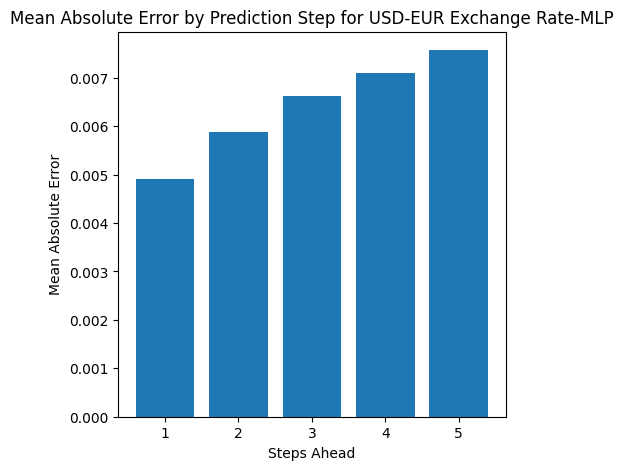

In [25]:
stepAheadChart(Exchangemetrics,'Mean Absolute Error by Prediction Step for USD-EUR Exchange Rate-MLP')


# 1 Step Ahead Predicction Plot Comparison

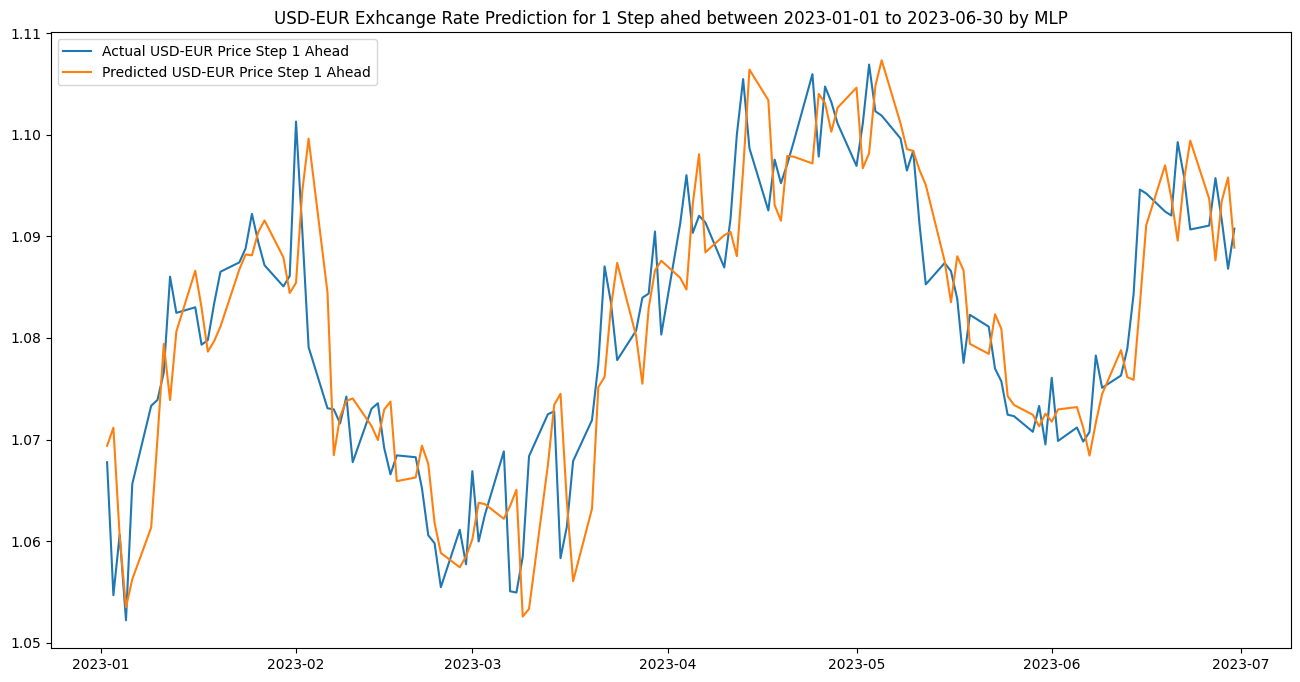

In [26]:
compare_plots(test_data['Actual_EUR_USD_Price_t+1'],
              test_data['Predicted_EUR_USD_Price_t+1'],
              "Actual USD-EUR Price Step 1 Ahead",
              "Predicted USD-EUR Price Step 1 Ahead",
              "USD-EUR Exhcange Rate Prediction for 1 Step ahed between 2023-01-01 to 2023-06-30 by MLP")


# 5 Step Ahead Predicction Plot Comparison

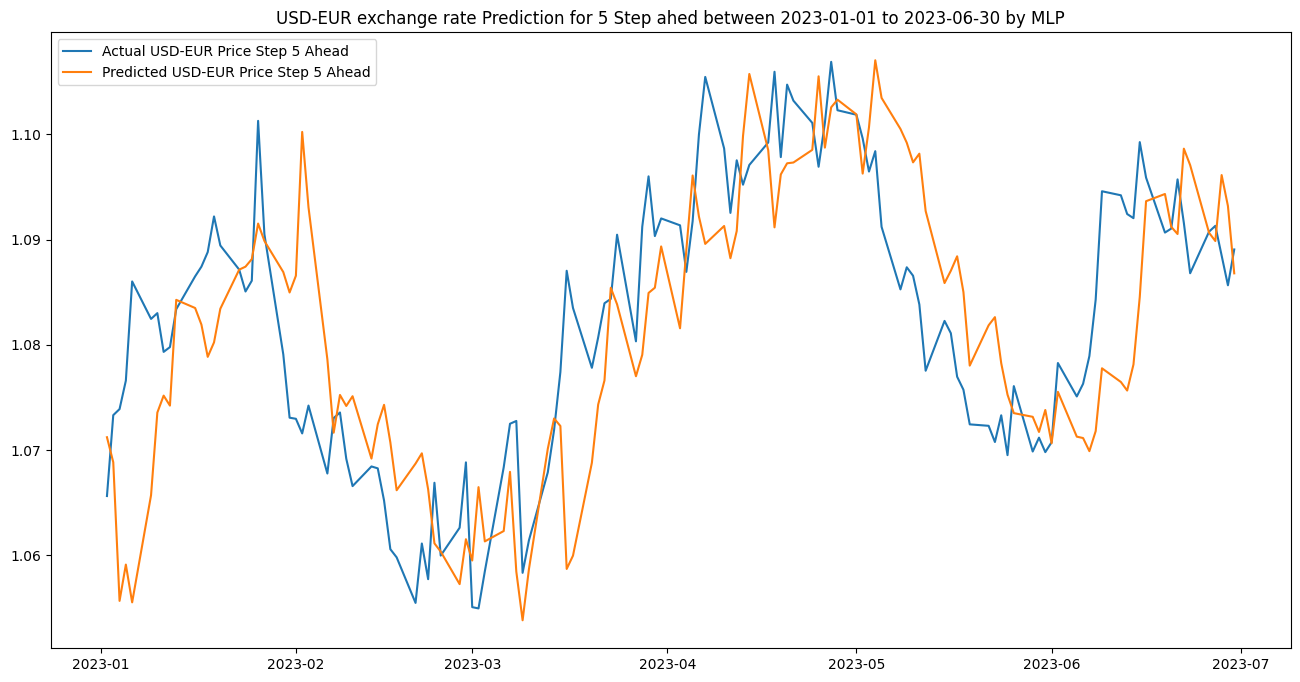

In [27]:
compare_plots(test_data['Actual_EUR_USD_Price_t+5'],
              test_data['Predicted_EUR_USD_Price_t+5'],
              "Actual USD-EUR Price Step 5 Ahead",
              "Predicted USD-EUR Price Step 5 Ahead",
              "USD-EUR exchange rate Prediction for 5 Step ahed between 2023-01-01 to 2023-06-30 by MLP")


In [28]:
price_bands = [(1.05, 1.07), (1.06, 1.07), (1.07, 1.08), (1.08, 1.09), (1.09, 1.10), (1.10, 1.11)]
CurMetrics_bands = calculate_price_band_metrics(test_data, 'Actual_EUR_USD_Price_t+1', 'Predicted_EUR_USD_Price_t+1', price_bands,1)
CurMetrics_bands




,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Price_Band,Number of Observations
0,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.005576,0.000051,0.007168,0.524828,1.05-1.07,30
1,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.004951,0.000038,0.006200,0.464140,1.06-1.07,20
2,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.004511,0.000039,0.006227,0.419401,1.07-1.08,31
3,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.004239,0.000030,0.005489,0.390724,1.08-1.09,26
4,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.004824,0.000035,0.005920,0.440663,1.09-1.1,33
5,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.006073,0.000055,0.007438,0.550265,1.1-1.11,10


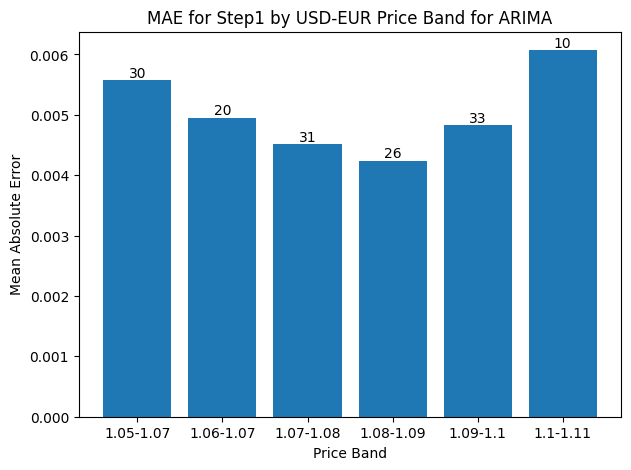

In [29]:
plot_metrics_by_band(CurMetrics_bands, 'Mean Absolute Error','MAE for Step1 by USD-EUR Price Band for ARIMA')


#Oil

# Selecting the Feature Columns & Prediction Column whcih will be used for Prediction


In [30]:
DateAttributes=[]


In [31]:
FeatureColumnsOil = [col for col in df_oil_currency.columns if col.startswith('Actual_Oil_Price_t-') ]
FeatureColumnsOil.insert(0,'Actual_Oil_Price_t')
FeatureColumnsOil.extend(DateAttributes)

PredictedColumnOil='Actual_Oil_Price_t+1'
FeatureColumnsOil

['Actual_Oil_Price_t',
 'Actual_Oil_Price_t-1',
 'Actual_Oil_Price_t-2',
 'Actual_Oil_Price_t-3',
 'Actual_Oil_Price_t-4']

# Scaling the values to bring them on same Scale


In [32]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Initialize the scalers
Oilscaler = MinMaxScaler(feature_range=(0,1))
Oilscaler_y = MinMaxScaler(feature_range=(0,1))

# Extract and scale the input features
X_train_oil = train_data[FeatureColumnsOil].values
X_train_oil_scaled = Oilscaler.fit_transform(X_train_oil)

# Extract and scale the target variable, then reshape to 1D array for training
Y_train_oil = train_data[PredictedColumnOil].values
Y_train_oil_scaled = Oilscaler_y.fit_transform(Y_train_oil.reshape(-1,1)).ravel()


#Finding the Best Param


In [33]:


# Assuming you have X_train and Y_train already defined
best_params_Oil = find_best_mlp_params(X_train_oil_scaled,Y_train_oil_scaled)
selected_columns = best_params_Oil.groupby('param_activation')[['mean_test_score']].idxmax()
best_params_Oil = best_params_Oil.loc[selected_columns['mean_test_score'],
                         ['param_activation', 'param_alpha',
                          'param_hidden_layer_sizes',
                          'param_learning_rate', 'param_solver',
                          'mean_test_score']]
best_params_Oil.sort_values(by='mean_test_score', ascending=False)


,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,mean_test_score
169,identity,0.0001,10,invscaling,lbfgs,0.981473
34,tanh,0.05,"(5, 5)",invscaling,lbfgs,0.970481
94,relu,0.1,10,adaptive,lbfgs,0.966515
145,logistic,0.1,10,constant,lbfgs,0.962104


In [34]:

for index, params in best_params_Oil.iterrows():
    model = train_mlp(X_train_oil_scaled,Y_train_oil_scaled, params.to_dict())


Score for identity: 0.99383386120398
Score for logistic: 0.9898104628526225
Score for relu: 0.9923148762194188
Score for tanh: 0.9925529811978754


#Fitting the Model


In [35]:
relu_Oil_params = best_params_Oil[best_params_Oil['param_activation'] == 'relu']
print(relu_Oil_params.iloc[0].to_dict())
Oilmodel = train_mlp(X_train_oil_scaled,Y_train_oil_scaled, relu_Oil_params.iloc[0].to_dict())

{'param_activation': 'relu', 'param_alpha': 0.1, 'param_hidden_layer_sizes': 10, 'param_learning_rate': 'adaptive', 'param_solver': 'lbfgs', 'mean_test_score': 0.9665145756237987}
Score for relu: 0.9923148762194188


# Recursive multi-step forecasting using 1 Step Ahead model to Predict upto 5 Step Ahead for Oil Price


In [36]:
StepsAheadPrediction=5
FeatureColumnsOil = [col for col in df_oil_currency.columns if col.startswith('Actual_Oil_Price_t-') and col.endswith('')]
FeatureColumnsOil.insert(0,'Actual_Oil_Price_t')
for i in range(1,StepsAheadPrediction+1):
  print(f"Features used in Step {i} are {FeatureColumnsOil}")
  X_test = test_data[FeatureColumnsOil+DateAttributes].values
  X_test_scaled = Oilscaler.transform(X_test)
  scaled_predictions = Oilmodel.predict(X_test_scaled)
  scaled_predictions = scaled_predictions.reshape(-1, 1)
  predictions = Oilscaler_y.inverse_transform(scaled_predictions)
  test_data['Predicted_Oil_Price_t+'+str(i)] = predictions
  FeatureColumnsOil.pop(-1)
  FeatureColumnsOil.insert(0,'Predicted_Oil_Price_t+'+str(i))


Features used in Step 1 are ['Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2', 'Actual_Oil_Price_t-3', 'Actual_Oil_Price_t-4']
Features used in Step 2 are ['Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2', 'Actual_Oil_Price_t-3']
Features used in Step 3 are ['Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2']
Features used in Step 4 are ['Predicted_Oil_Price_t+3', 'Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1']
Features used in Step 5 are ['Predicted_Oil_Price_t+4', 'Predicted_Oil_Price_t+3', 'Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t']


In [37]:
Oilresults = []

StepsAheadPrediction = 5
for i in range(1, StepsAheadPrediction+1):
    actual_col = f'Actual_Oil_Price_t+{i}'
    predicted_col = f'Predicted_Oil_Price_t+{i}'
    Oilresults.append(calculate_metrics(test_data[actual_col], test_data[predicted_col], actual_col, predicted_col, i))

OilMetrics = pd.DataFrame(Oilresults)
OilMetrics


,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,1.441073,3.776130,1.943227,1.832753
1,Actual_Oil_Price_t+2,Predicted_Oil_Price_t+2,2,1.789163,5.711113,2.389794,2.275170
2,Actual_Oil_Price_t+3,Predicted_Oil_Price_t+3,3,2.196296,7.983192,2.825454,2.790799
3,Actual_Oil_Price_t+4,Predicted_Oil_Price_t+4,4,2.690501,10.786799,3.284326,3.410500
4,Actual_Oil_Price_t+5,Predicted_Oil_Price_t+5,5,2.915948,13.251932,3.640320,3.686954


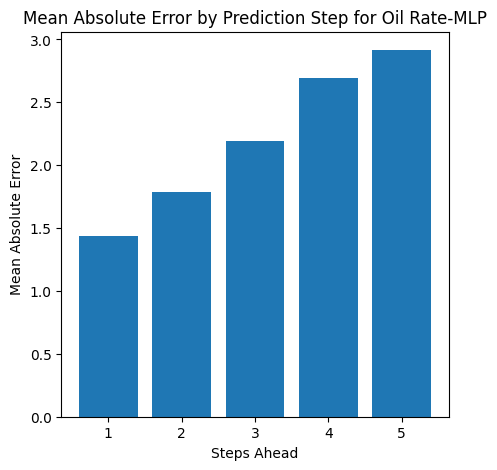

In [38]:
stepAheadChart(OilMetrics,'Mean Absolute Error by Prediction Step for Oil Rate-MLP')


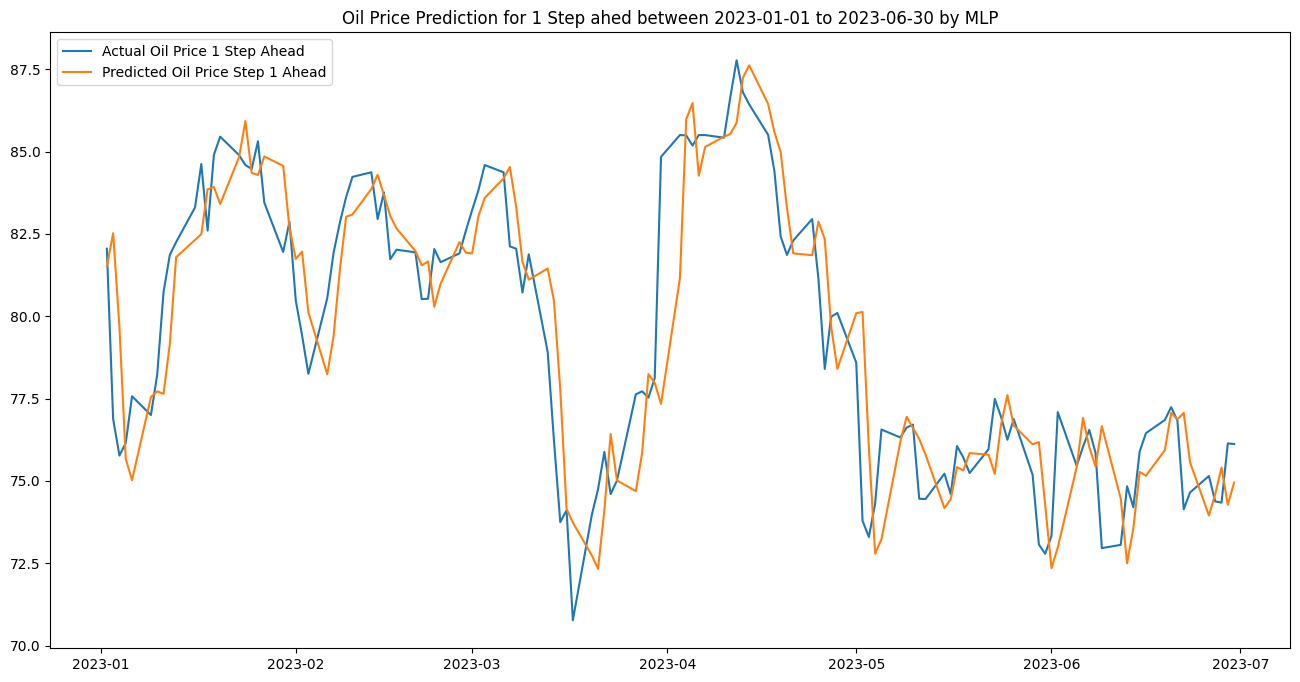

In [39]:
compare_plots(test_data['Actual_Oil_Price_t+1'],
              test_data['Predicted_Oil_Price_t+1'],
              "Actual Oil Price 1 Step Ahead",
              "Predicted Oil Price Step 1 Ahead",
              "Oil Price Prediction for 1 Step ahed between 2023-01-01 to 2023-06-30 by MLP")


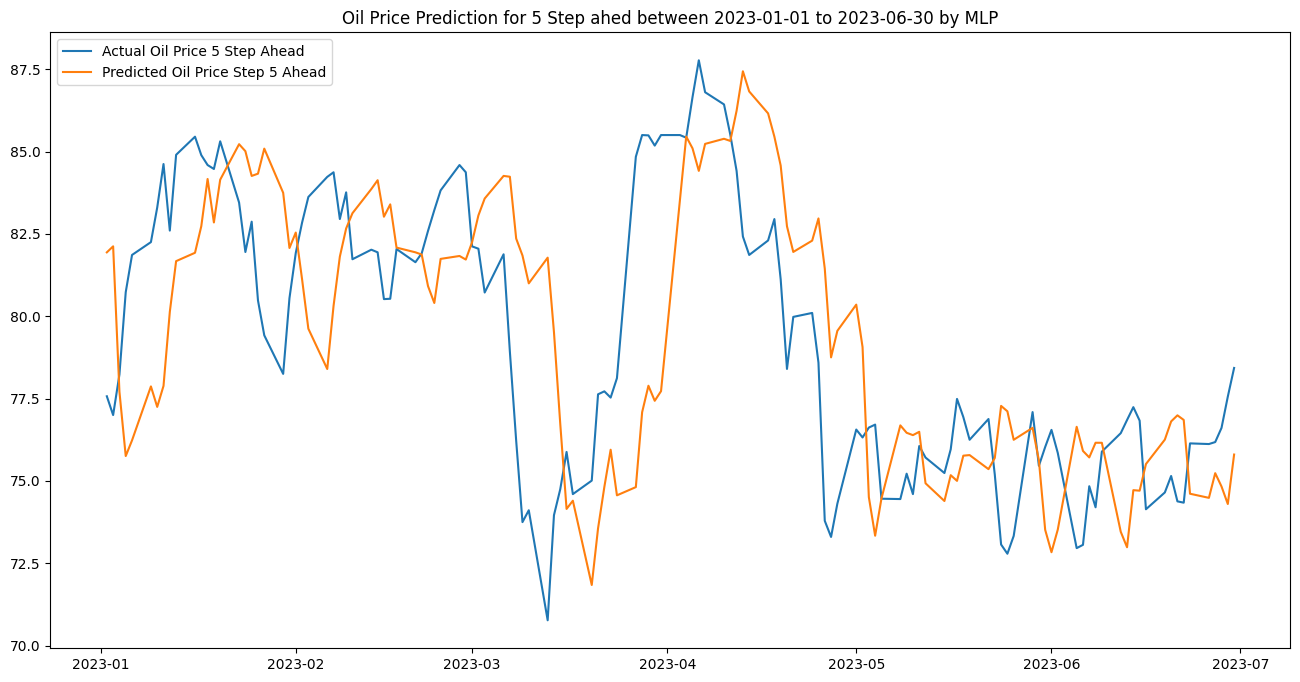

In [40]:
compare_plots(test_data['Actual_Oil_Price_t+5'],
              test_data['Predicted_Oil_Price_t+5'],
              "Actual Oil Price 5 Step Ahead",
              "Predicted Oil Price Step 5 Ahead",
              "Oil Price Prediction for 5 Step ahed between 2023-01-01 to 2023-06-30 by MLP")


In [41]:
price_bands = [(70, 75), (75, 80), (80, 85), (85, 90)]
OilMetrics_bands = calculate_price_band_metrics(test_data, 'Actual_Oil_Price_t+1', 'Predicted_Oil_Price_t+1', price_bands,1)
OilMetrics_bands

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Price_Band,Number of Observations
0,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,1.963426,5.894965,2.427955,2.666443,70-75,23
1,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,1.367660,3.714385,1.927274,1.775971,75-80,46
2,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,1.309777,3.113581,1.764534,1.586303,80-85,48
3,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,1.261463,2.692242,1.640805,1.468650,85-90,13


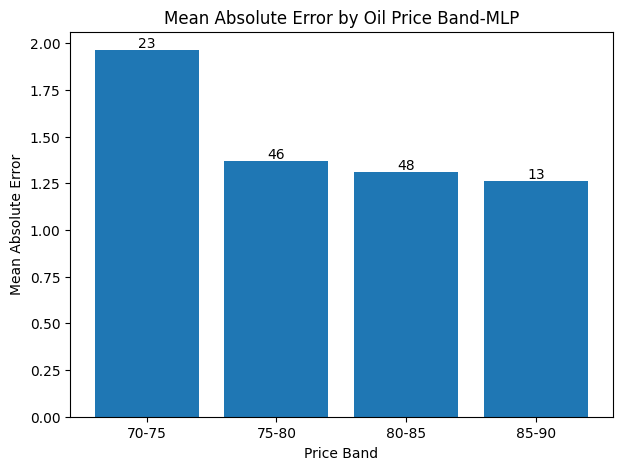

In [42]:
plot_metrics_by_band(OilMetrics_bands, 'Mean Absolute Error','Mean Absolute Error by Oil Price Band-MLP')


#Currency + OIL

# Selecting the Feature Columns & Prediction Column which will be used for Prediction


In [43]:
DateAttributes=[]


In [44]:
FeatureColumnsOilCurrency = [col for col in train_data.columns if col.startswith('Actual_EUR_USD_Price_t-')]
FeatureColumnsOilCurrency.insert(0,'Actual_EUR_USD_Price_t')

FeatureColumnsOilCurrency.append('Actual_Oil_Price_t+1')
FeatureColumnsOilCurrency.extend(DateAttributes)

PredictedColumnOilCurrency='Actual_EUR_USD_Price_t+1'
FeatureColumnsOilCurrency

['Actual_EUR_USD_Price_t',
 'Actual_EUR_USD_Price_t-1',
 'Actual_EUR_USD_Price_t-2',
 'Actual_EUR_USD_Price_t-3',
 'Actual_EUR_USD_Price_t-4',
 'Actual_Oil_Price_t+1']

# Scaling the values to bring them on same Scale


In [45]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler
CurOilscaler = MinMaxScaler(feature_range=(0,1))

X_train = train_data[FeatureColumnsOilCurrency].values
X_train_scaled = CurOilscaler.fit_transform(X_train)

CurOilscaler_y = MinMaxScaler(feature_range=(0,1))

Y_train = train_data[PredictedColumnOilCurrency].values
Y_train_scaled = CurOilscaler_y.fit_transform(Y_train.reshape(-1,1))



#Finding the Best Param


In [46]:

best_params_CurOil = find_best_mlp_params(X_train_scaled, Y_train_scaled.ravel())

selected_columns = best_params_CurOil.groupby('param_activation')[['mean_test_score']].idxmax()
best_params_CurOil = best_params_CurOil.loc[selected_columns['mean_test_score'],
                         ['param_activation', 'param_alpha',
                          'param_hidden_layer_sizes',
                          'param_learning_rate', 'param_solver',
                          'mean_test_score']]
best_params_CurOil.sort_values(by='mean_test_score', ascending=False)


,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,mean_test_score
61,relu,0.0001,10,invscaling,lbfgs,0.971571
124,logistic,0.0001,"(5, 5)",invscaling,lbfgs,0.958692
163,identity,0.0001,10,constant,lbfgs,0.956849
43,tanh,0.1,10,invscaling,lbfgs,0.919021


In [47]:
for index, params in best_params_CurOil.iterrows():
    model = train_mlp(X_train_scaled, Y_train_scaled.ravel(), params.to_dict())


Score for identity: 0.9929544335261277
Score for logistic: 0.9902449389548278
Score for relu: 0.9927161524530864
Score for tanh: 0.9926133145384782


#Fitting the Model

In [48]:
relu_CurOil_params = best_params_CurOil[best_params_CurOil['param_activation'] == 'relu']
print(relu_CurOil_params.iloc[0].to_dict())
CurOilmodel = train_mlp(X_train_scaled, Y_train_scaled.ravel(), relu_CurOil_params.iloc[0].to_dict())

{'param_activation': 'relu', 'param_alpha': 0.0001, 'param_hidden_layer_sizes': 10, 'param_learning_rate': 'invscaling', 'param_solver': 'lbfgs', 'mean_test_score': 0.9715713208229257}
Score for relu: 0.9927161524530864


#Recursive multi-step forecasting using 1 Step Ahead model to Preict upto 5 Step Ahead for USD-EUR Exchange rate by using Oil Prices to validate its impact


In [49]:
FeatureColumnsOilCurrency=['Actual_EUR_USD_Price_t','Actual_EUR_USD_Price_t-1','Actual_EUR_USD_Price_t-2','Actual_EUR_USD_Price_t-3','Actual_EUR_USD_Price_t-4']
StepsAheadPrediction=5
for i in range(1,StepsAheadPrediction+1):
  FeatureColumnsOilCurrency.append('Predicted_Oil_Price_t+'+ str(i))
  print(f"Features used in Step {i} are {FeatureColumnsOilCurrency+DateAttributes}")

  X_test = test_data[FeatureColumnsOilCurrency+DateAttributes].values
  X_test_scaled = CurOilscaler.transform(X_test)
  scaled_predictions = CurOilmodel.predict(X_test_scaled).reshape(-1, 1)
  # inverse transform the scaled predictions
  predictions = CurOilscaler_y.inverse_transform(scaled_predictions)
  test_data['Predicted_EUR_USD_Price_WithOil_t+'+str(i)] = predictions
  FeatureColumnsOilCurrency.remove('Predicted_Oil_Price_t+'+ str(i))
  FeatureColumnsOilCurrency.pop(-1)
  FeatureColumnsOilCurrency.insert(0,'Predicted_EUR_USD_Price_WithOil_t+'+str(i))


Features used in Step 1 are ['Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Actual_EUR_USD_Price_t-2', 'Actual_EUR_USD_Price_t-3', 'Actual_EUR_USD_Price_t-4', 'Predicted_Oil_Price_t+1']
Features used in Step 2 are ['Predicted_EUR_USD_Price_WithOil_t+1', 'Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Actual_EUR_USD_Price_t-2', 'Actual_EUR_USD_Price_t-3', 'Predicted_Oil_Price_t+2']
Features used in Step 3 are ['Predicted_EUR_USD_Price_WithOil_t+2', 'Predicted_EUR_USD_Price_WithOil_t+1', 'Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Actual_EUR_USD_Price_t-2', 'Predicted_Oil_Price_t+3']
Features used in Step 4 are ['Predicted_EUR_USD_Price_WithOil_t+3', 'Predicted_EUR_USD_Price_WithOil_t+2', 'Predicted_EUR_USD_Price_WithOil_t+1', 'Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Predicted_Oil_Price_t+4']
Features used in Step 5 are ['Predicted_EUR_USD_Price_WithOil_t+4', 'Predicted_EUR_USD_Price_WithOil_t+3', 'Predicted_EUR_USD_Price_WithOil_t+2', 'Predicted_E

In [50]:
Exchangeresults = []
StepsAheadPrediction = 5

for i in range(1, StepsAheadPrediction+1):
    actual_col = f'Actual_EUR_USD_Price_t+{i}'
    predicted_col = f'Predicted_EUR_USD_Price_WithOil_t+{i}'
    Exchangeresults.append(calculate_metrics(test_data[actual_col], test_data[predicted_col], actual_col, predicted_col, i))

OilExchangemetrics = pd.DataFrame(Exchangeresults)
OilExchangemetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.004452,0.000032,0.005639,0.411869
1,Actual_EUR_USD_Price_t+2,Predicted_EUR_USD_Price_WithOil_t+2,2,0.005673,0.000055,0.007409,0.524860
2,Actual_EUR_USD_Price_t+3,Predicted_EUR_USD_Price_WithOil_t+3,3,0.006568,0.000068,0.008264,0.607675
3,Actual_EUR_USD_Price_t+4,Predicted_EUR_USD_Price_WithOil_t+4,4,0.006891,0.000081,0.008974,0.637139
4,Actual_EUR_USD_Price_t+5,Predicted_EUR_USD_Price_WithOil_t+5,5,0.007481,0.000091,0.009531,0.690982


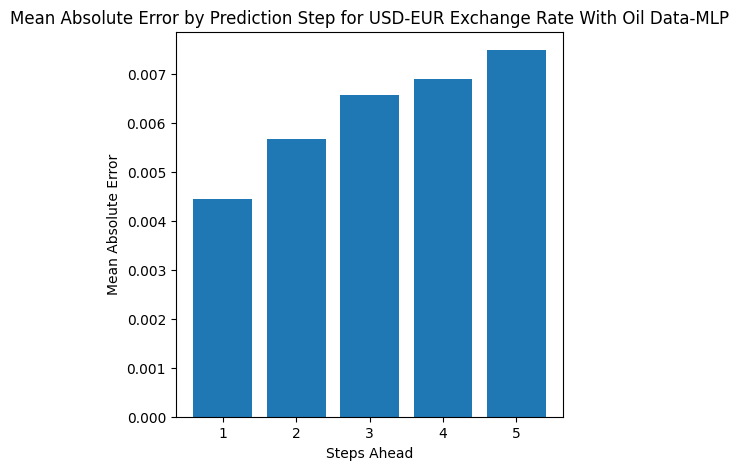

In [51]:
stepAheadChart(OilExchangemetrics,'Mean Absolute Error by Prediction Step for USD-EUR Exchange Rate With Oil Data-MLP')


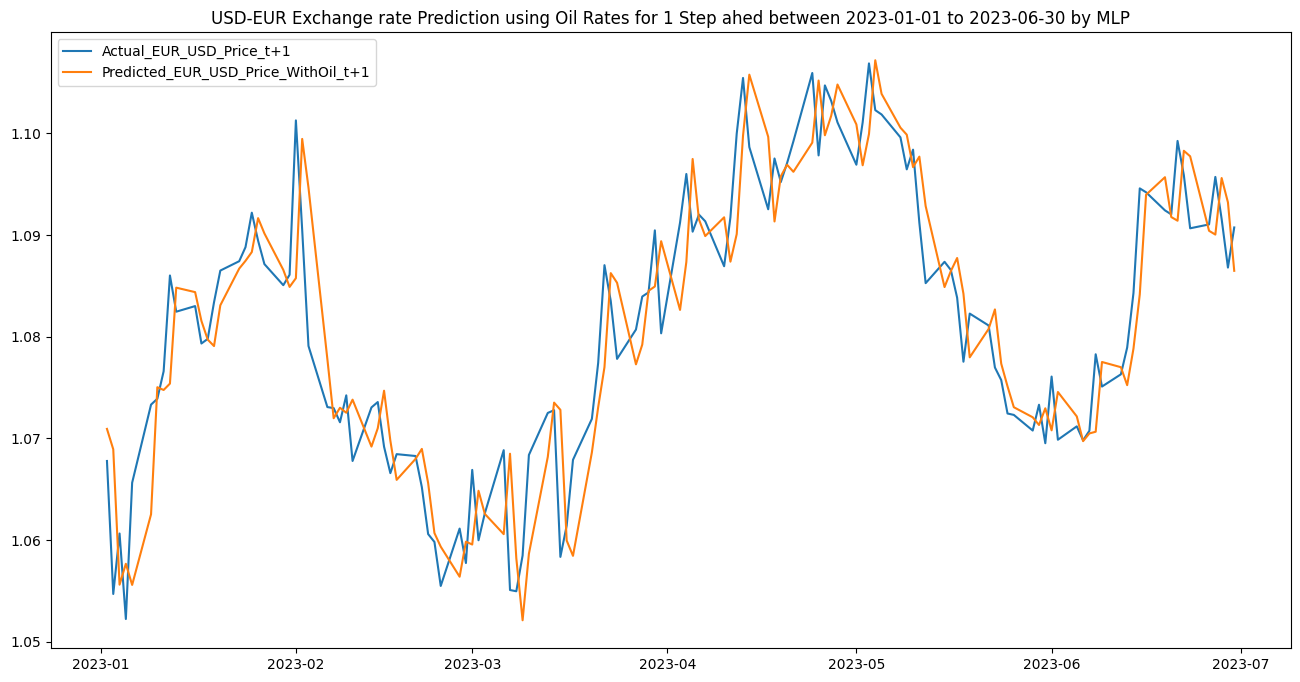

In [52]:
compare_plots(test_data['Actual_EUR_USD_Price_t+1'],
              test_data['Predicted_EUR_USD_Price_WithOil_t+1'],
              "Actual_EUR_USD_Price_t+1",
              "Predicted_EUR_USD_Price_WithOil_t+1",
              "USD-EUR Exchange rate Prediction using Oil Rates for 1 Step ahed between 2023-01-01 to 2023-06-30 by MLP")


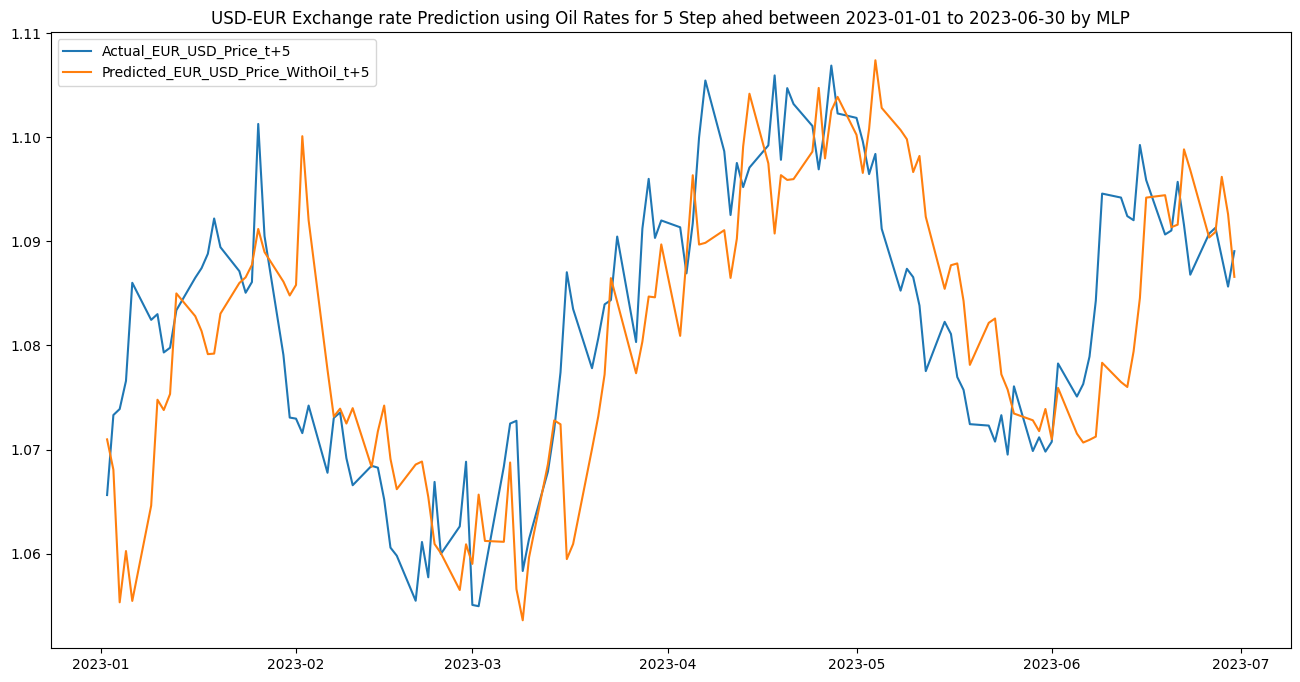

In [53]:
compare_plots(test_data['Actual_EUR_USD_Price_t+5'],
              test_data['Predicted_EUR_USD_Price_WithOil_t+5'],
              "Actual_EUR_USD_Price_t+5",
              "Predicted_EUR_USD_Price_WithOil_t+5",
              "USD-EUR Exchange rate Prediction using Oil Rates for 5 Step ahed between 2023-01-01 to 2023-06-30 by MLP")


In [54]:
price_bands = [(1.05, 1.07), (1.06, 1.07), (1.07, 1.08), (1.08, 1.09), (1.09, 1.10), (1.10, 1.11)]
CurOilMetrics_bands = calculate_price_band_metrics(test_data, 'Actual_EUR_USD_Price_t+1', 'Predicted_EUR_USD_Price_WithOil_t+1', price_bands,1)
CurOilMetrics_bands


,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Price_Band,Number of Observations
0,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.005424,0.000045,0.006684,0.510650,1.05-1.07,30
1,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.004692,0.000031,0.005584,0.439896,1.06-1.07,20
2,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.003512,0.000023,0.004834,0.326433,1.07-1.08,31
3,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.003758,0.000023,0.004753,0.346416,1.08-1.09,26
4,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.004642,0.000031,0.005577,0.424146,1.09-1.1,33
5,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.005628,0.000045,0.006744,0.510041,1.1-1.11,10


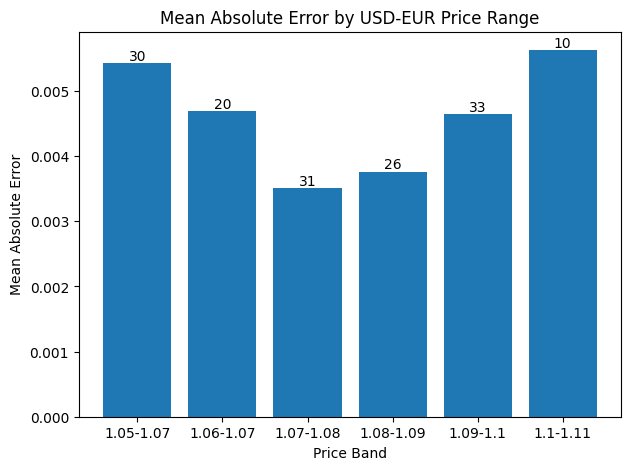

In [55]:
plot_metrics_by_band(CurOilMetrics_bands, 'Mean Absolute Error','Mean Absolute Error by USD-EUR Price Range')


# Writing test data to folder to do comapritive analysis with other models data


In [56]:
test_data.to_csv("/content/drive/MyDrive/dissertation/test_MLP.csv")

In [57]:
combined_df = pd.concat([Exchangemetrics, OilMetrics, OilExchangemetrics], axis=0, ignore_index=True)
combined_df['Model'] = 'MLP'
combined_df.to_csv("/content/drive/MyDrive/dissertation/Mertics_MLP.csv")

In [58]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time} seconds")


Time taken: 91.83124923706055 seconds
